<hr/>

# Foundations of Reinforcement Learning

<hr/>

<h1><font color="darkblue">Lab 1: Intro to Python and two problems on probability</font></h1>

Margarita Prikhodko

##  Content
1. Jupyter and Jupyterhub
2. Python basic
3. Library installation
4. Lab Problems

### 1. Jupyter and Jupyterhub
#### 1.1 Jupyter

Jupyter is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text, (see https://jupyter.org/). To naviagate through Jupyter devalopment environment, see [Notebook Basic](https://github.com/ipython/ipython-in-depth/blob/7e5ce96cc9251083979efdfc393425f1229a4a68/examples/Notebook/Notebook%20Basics.ipynb).

#### 1.2 Jupyterhub
You are currently viewing a Jupyter Notebook file running remotely on Jupyterhub of this class. Jupyterhub basically has the same features as Jupyter but saving and executing your code in the cloud. Therefore, you could avoid python & jupyter installation tasks and access relatively high computational power.

#### 1.3 [Optional] Install Jupyter on your computer
If you prefer to have Jupyter on your computer and run codes offline (e.g. you don't have a stable internet connection), try<br>
[Install Python](https://www.python.org/downloads/) <br>
[Install Anaconda](https://www.anaconda.com/distribution/#download-section)

### 2. Python basic
Python is the programming language we use for this course. If Python seems unfamiliar to you, [Python tutorial](https://cs231n.github.io/python-numpy-tutorial/) may give you a quick start.

### 3 Library Installation
You can add libraries to the Jupyter/Jupyterhub devalopment environment by the following steps:

#### Step 1. Call pip to install
Run the following code

In [1]:
!pip install numpy
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


#### Step 2. Add system path (needed only for the first time you add library)
Run the following code

In [2]:
import sys
sys.path.append('FILL IN the installed librarys file directory')
# If you don't know the file directory:
#   Run step 1 again you might see the file directory
#   For the course Jupyterhub it should be /home/**FILL IN YOUR USER NAME**/.local/lib/python3.6/site-packages

### 4. Lab Problems

In [3]:
%matplotlib inline 

import numpy as np 
import matplotlib.pyplot as plt  
# import useful libraries

### Problem 1

Given the following mixture of two Gaussians,

$\displaystyle \qquad f(x) = \frac{4}{5\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right) + \frac{1}{10\sqrt{2\pi}} \exp\left(-\frac{(x-3)^2}{8}\right)$,


1. Plot the distribution function $f(x)$; (1 pts)
2. Calculate the mean and variance of the given mixture of two Gaussians; (2 pts)
0. Sample 1000000 values from the given mixture of two Gaussians; (3 pts)
0. Plot a distribution histgram of your sampled values. (3 pts)
0. Show the mean and variance of your sampled values. (1 pts)

Total of 10 points

### Soulution:
#### 1.

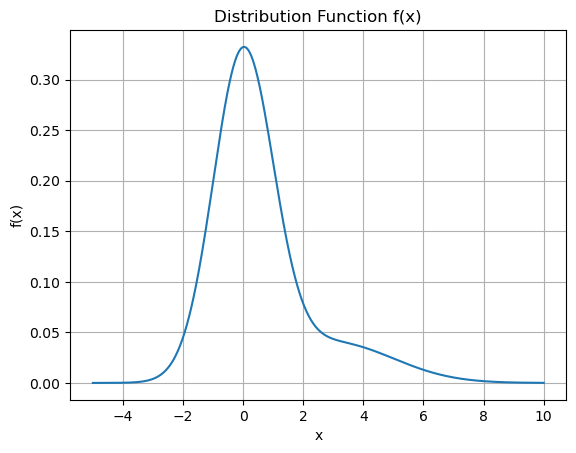

In [4]:

import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return (4 /5/ (np.sqrt(2 * np.pi))) * np.exp(-x**2/2) + (1 / (10 * np.sqrt(2 * np.pi))) * np.exp(-((x - 3)**2) / 8)

# Generate x values
x = np.linspace(-5, 10, 1000)

# Calculate f(x) for each x
y = f(x)

# Plot the distribution function f(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Distribution Function f(x)')
plt.grid(True)
plt.show()

#### 2.



#### 3.

#### 2. Mean will be sum of 2 means from different distributions. First mean=0 and second mean will be 3/5=0.6 :

In [5]:
# Calculate the mean using numerical integration
import numpy as np
from scipy.integrate import quad
mean, _ = quad(lambda x: x * f(x), -np.inf,np.inf)
print("Mean (μ) of the function f(x):", mean)


Mean (μ) of the function f(x): 0.6000000000000012


#### 3. variance will be weightened sum of 2 variance

In [6]:
variance=3.04
print("Variance (σ^2) of the function f(x): manually", variance)

Variance (σ^2) of the function f(x): manually 3.04


Variance is integral (x-mean)**2f(x)

In [7]:
variance, _ = quad(lambda x: (x - mean)**2 * f(x), -np.inf, np.inf)

print("Variance (σ^2) of the function f(x):", variance)

Variance (σ^2) of the function f(x): 3.04


In [8]:
# Sample 1000000 values from the mixture
samples = np.random.choice(np.linspace(-4, 8, 10000), size=1000000, p=f(np.linspace(-4, 8, 10000)) / sum(f(np.linspace(-4, 8, 10000))))
y_samples=f(samples)


In [9]:
print("Mean of sample "+ str(samples.mean()))

Mean of sample 0.5943949510951101


In [10]:
print("Variance of sample "+ str(samples.var()))

Variance of sample 2.9707862157805396


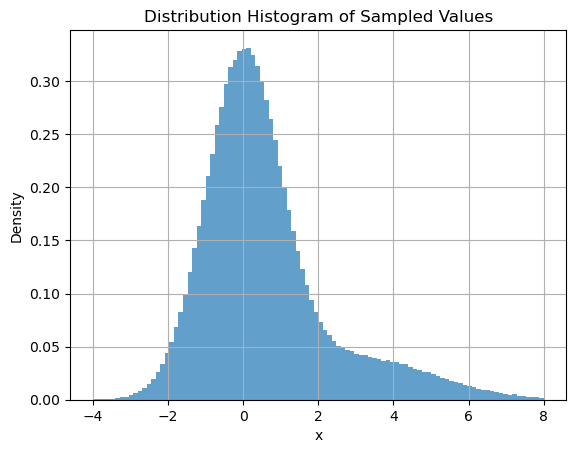

In [11]:
# Plot a distribution histogram of the sampled values
plt.hist(samples, bins=100, density=True, alpha=0.7)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Distribution Histogram of Sampled Values')
plt.grid(True)
plt.show()

### Problem 2 [Monty Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem)

#### "Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the other doors, opens another door, say No. 3, which has a goat. He then says to you, 'Do you want to pick door No. 2?' Is it to your advantage to take the switch?" 
Note that we assume the host knows which door the car is behind and will not reveal the location of the car until after the contestant has had the opportunity to switch doors. Say you get reward = 1 for winning the car and reward = 0 otherwise, run this game 1000 times and
1. Plot your average rewards at each time if you always switch; (5 pts)
2. Plot your average rewards at each time if you never switch. (5 pts)


Total of 10 points

#### 1.

#### 2.

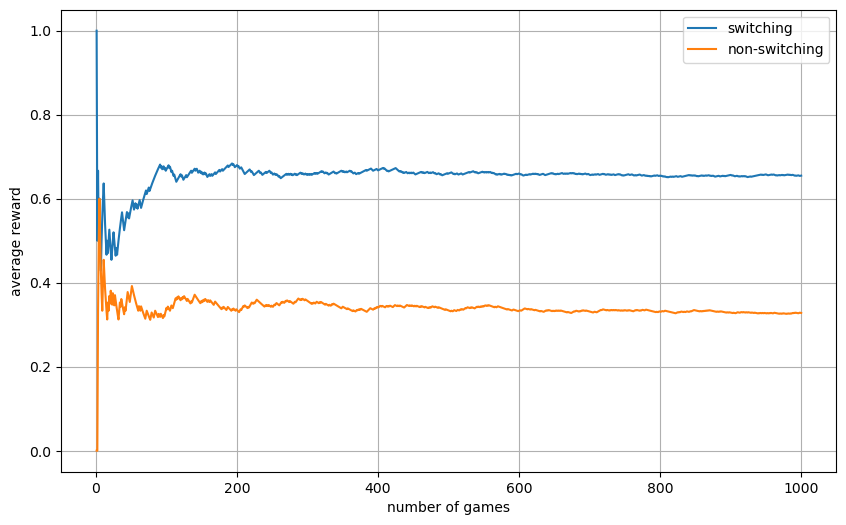

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# function to simulate the Monty Hall game
def simulation(switch=True, number_games=1000):
    # initialize variables to keep track of rewards and strategies
    rewards = np.zeros(number_games)
    strategies = np.zeros(number_games)

    # simulate the game
    for game in range(number_games):
        # randomly place the car behind one of the three doors
        carposition = np.random.randint(3)
          
        # contestant initially chooses a door
        chosendoor = np.random.randint(3)

        #  opens a door with a goat behind it
      
        doors_with_goats = list(set([0, 1, 2]) - set([chosendoor, carposition]))
        montyopens = np.random.choice(doors_with_goats)

        # find the door to switch to
        switch_to = list(set([0, 1, 2]) - set([chosendoor, montyopens]))[0] if switch else chosendoor

        # memorize the reward (1 for winning the car, 0 otherwise)
        
        rewards[game] = 1 if switch_to == carposition else 0

        # memorize the strategy (1 for switching, 0 for not switching)
        strategies[game] = 1 if switch else 0
        
        cumulative_reward=rewards.cumsum() / np.arange(1, number_games + 1)
        
    return cumulative_reward

# Number of simulation runs
num_games = 1000

# Simulate and compute average rewards for switching and not switching
average_rewards_switch = simulation(switch=True, number_games=num_games)
average_rewards_no_switch = simulation(switch=False, number_games=num_games)

# Plot the average rewards over time for both strategies
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_games + 1), average_rewards_switch, label='switching')
plt.plot(range(1, num_games + 1), average_rewards_no_switch, label='non-switching')
plt.xlabel('number of games')
plt.ylabel('average reward')

plt.legend()
plt.grid(True)
plt.show()
